# SCIP example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with SCIP solver**.

## Load data

import required modules

In [1]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [3]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)

<Axes: >

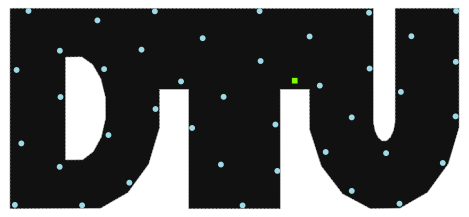

In [4]:
wfn.plot_location()

## Optimize

Warmstart with `EWRouter`:

In [5]:
res_warmstart= wfn.optimize(router=EWRouter())
print(wfn.length())

1820.1681190424422


In [ ]:
milp_router = MILPRouter(solver_name='scip', time_limit=60, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=milp_router)

Solver <scip> is not capable of warm-starting.


SCIP version 9.2.2 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 7.1.4] [GitHash: 416226a4f8]
Copyright (c) 2002-2025 Zuse Institute Berlin (ZIB)

External libraries: 
  SoPlex 7.1.4         Linear programming solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: 7c53d552]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (github.com/coin-or/CppAD)
  ZLIB 1.3.1           General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.3.0            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.6.2          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  AMPL/MP 690e9e7      AMPL .nl file reader library (github.com/ampl/mp)
  PaPILO 2.4.2         parallel presolve for integer and linear optimization (github.com/scipopt/papilo) (built with TBB) [GitHash: 4b399c4c]
  Nauty 2.8.8          Computing Graph Automor

In [7]:
wfn.solution_info()

SolutionInfo(runtime=<pyomo.opt.results.container.UndefinedData object at 0x000001E9EC8F34D0>, bound=1567.72957678712, objective=1575.35543592401, relgap=0.0048407229016332876, termination='other')

In [8]:
wfn.length()

1575.355435924007

<Axes: >

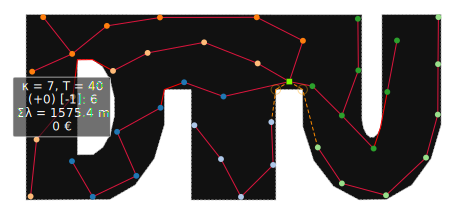

In [9]:
wfn.plot()